In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_groq import ChatGroq
from dotenv import load_dotenv
import os
load_dotenv()


True

In [3]:

model = ChatGroq(
    model="llama3-8b-8192",  # ✅ REQUIRED
    temperature=0.7
)


In [13]:
# Define the State
class BlogState(TypedDict):
    title : str
    outline : str
    content : str
    score : int

In [14]:
def create_outline(state : BlogState) -> BlogState:
    title = state['title']
    prompt = f'Generate a detailed outline for a blog on the topic {title}'
    outline = model.invoke(prompt).content
    state['outline'] = outline
    return state

def generate_content(state : BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']
    prompt = f'Write a detaild blog on the title {title} Based on the following outline \n {outline}.'
    content = model.invoke(prompt).content
    state['content'] = content
    return state

def evaluate(state : BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']
    content = state['content']
    prompt = f"Based on the given topic {title} and given outline \n {outline}. I have created this content for the blog \n {content}. Please evaluate the content and assign a score out of 10. Just give the numeric score nothing else"
    score = model.invoke(prompt).content
    state['score'] = score
    return state


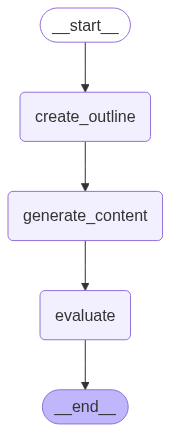

In [15]:
graph = StateGraph(BlogState)

graph.add_node('create_outline',create_outline)
graph.add_node('generate_content', generate_content)
graph.add_node('evaluate', evaluate)

# Add edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline','generate_content')
graph.add_edge('generate_content','evaluate')
graph.add_edge('evaluate', END)
# 
workflow = graph.compile()
workflow

In [16]:
intial_state = {'title' : 'Earth Resources vs Population'}
final_state = workflow.invoke(intial_state)
print(final_state['outline'])

Here is a detailed outline for a blog on the topic "Earth Resources vs Population":

**Title:** The Great Divide: Can Earth's Resources Keep Up with Our Growing Population?

**I. Introduction**

* Brief overview of the topic and its importance
* Statistics on the current population and projected growth
* Thesis statement: The growing population is putting a strain on Earth's resources, and it's essential to address this issue to ensure a sustainable future.

**II. The Current State of Earth's Resources**

* Overview of the world's natural resources, including:
	+ Water: scarcity, quality, and distribution
	+ Food: production, distribution, and access
	+ Energy: fossil fuels, renewable energy, and energy efficiency
	+ Minerals and metals: supply, demand, and environmental impact
* Statistics and examples to illustrate the challenges:

* "The world's population is expected to reach 9.7 billion by 2050, putting a significant strain on our finite resources" (Source: UN Department of Econom

In [12]:
print(final_state['content'])

**Earth Resources vs Population: A Growing Concern for a Sustainable Future**

The world is facing a critical challenge: an ever-growing population is putting a strain on the Earth's resources, threatening the very foundation of our existence. The increasing demand for natural resources, such as water, food, energy, land, and minerals, is outpacing the planet's ability to replenish them, leading to depletion, degradation, and environmental disasters. In this blog, we will delve into the state of the Earth's resources, the impact of population growth on these resources, the consequences of inaction, and potential sustainable solutions to address this pressing issue.

**The State of the Earth's Resources**

The Earth's natural resources are finite and non-renewable. Water, the most essential resource, is being depleted at an alarming rate. According to the World Wildlife Fund (WWF), nearly 2 billion people live in water-scarce areas, and by 2025, half of the world's population will be li

In [17]:
print(final_state['score'])

8
